
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of generic asset classes and asset subclasses.  Construct portfolios of generic asset classes and examine the results of different weighting schemes.


In [39]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [40]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [41]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [42]:
investment_universe = ['asset-class-galaxy']

In [43]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate=0, annual_returns='5 Yr', standard_deviation='SD 5 Yr')
df = df.drop('Description', axis=1)
df

,Investment Option,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
0,US Stocks,US Stocks,-59.51,-25.67,9.36,10.21,15.38,19.78,13.47,12.44,17.53,17.24,15.38,17.24,0.89
1,Global Stocks,Global Stocks,31.16,17.82,8.81,6.69,9.27,16.24,9.08,9.18,16.48,15.47,9.27,15.47,0.60
2,US Bonds,US Bonds,25.09,1.25,4.53,-0.19,-0.65,4.94,2.23,5.90,7.70,6.44,-0.65,6.44,-4.19
3,Global Bonds,Global Bonds,-11.93,-6.77,3.08,0.33,-0.52,4.96,3.49,4.07,6.23,5.30,-0.52,5.30,-2.76
4,Cash Equivalents,Cash Equivalents,4.54,4.46,4.99,4.12,2.44,0.17,0.00,0.27,0.47,0.68,2.44,0.68,3.59
5,Real Estate,Real Estate,-12.05,-13.82,7.60,-0.87,4.53,17.45,11.54,17.71,20.90,19.59,4.53,19.59,0.23
6,Commodities,Commodities,-17.28,18.74,3.78,-1.86,13.96,11.20,6.64,5.66,11.91,15.39,13.96,15.39,0.91
7,Currencies,Currencies,-35.33,-4.95,6.62,6.66,4.04,8.09,6.05,7.07,7.78,7.07,4.04,7.07,0.57
8,Managed Futures,Managed Futures,-7.48,35.84,24.07,12.57,12.57,13.41,6.55,10.97,16.14,16.14,12.57,16.14,0.78
9,Balanced,Balanced,-7.35,-4.18,6.37,3.84,5.07,7.80,4.92,6.41,10.31,9.15,5.07,9.15,0.55


### Sample Portfolios
Format 'Investment option': weight

In [44]:
# Benchmark Portfolio: 60/40
benchmark_portfolio = {
    'Title': 'Benchmark Portfolio: 60/40',
    'US Stocks': 0.60,
    'US Bonds': 0.40
}

# Global 60-40 Portfolio
global_portfolio = {
    'Title': 'Global 60-40 Portfolio',
    'Global Stocks': 0.60,
    'Global Bonds': 0.40
}

# Risk Parity Portfolio
risk_party_portfolio = {
    'Title': 'Risk Parity Portfolio',
    'US Stocks:Large Cap': 0.08,
    'Global Stocks:Developed Markets': 0.08,
    'US Bonds:Investment Grade': 0.35,
    'US Bonds:Treasury Notes (T-notes)': 0.34,
    'Commodities': 0.05,
    'Commodities:Gold': 0.05,
    'Real Estate:REIT': 0.05
}

# All Seasons Portfolio
all_seasons_portfolio = {
    'Title': 'All Seasons Portfolio',
    'US Stocks:Large Cap': 0.18,
    'US Stocks:Small Cap': 0.03,
    'Global Stocks:Developed Markets': 0.06,
    'Global Stocks:Emerging Markets': 0.03,
    'US Bonds:Treasury Notes (T-notes)': 0.15,
    'US Bonds:Treasury Bonds (T-bonds)': 0.39,
    'Commodities': 0.08,
    'Commodities:Gold': 0.08
}

# Permanent Portfolio
permanent_portfolio = {
    'Title': 'Permanent Portfolio',
    'US Stocks:Large Cap': 0.08,
    'Global Stocks:Developed Markets': 0.08,
    'US Bonds:Investment Grade': 0.35,
    'US Bonds:Treasury Notes (T-notes)': 0.34,
    'Commodities': 0.05,
    'Commodities:Gold': 0.05,
    'Real Estate:REIT': 0.05
}

# Global Market Portfolio
global_market_portfolio = {
    'Title': 'Global Market Portfolio',
    'US Stocks:Large Cap': 0.20,
    'Global Stocks:Developed Markets': 0.15,
    'Global Stocks:Emerging Markets': 0.05,
    'US Bonds:Investment Grade': 0.22,
    'US Bonds:Treasury Bonds (T-bonds)': 0.15,
    'Global Bonds': 0.16,
    'US Bonds:Treasury Inflation-Protected Securities (TIPS)': 0.02,
    'Real Estate:REIT': 0.05
}

# Rob Arnott Portfolio
rob_arnott_portfolio = {
    'Title': 'Rob Arnott Portfolio',
    'US Stocks:Large Cap': 0.10,
    'Global Stocks:Developed Markets': 0.10,
    'US Bonds:Investment Grade': 0.20,
    'US Bonds:Treasury Bonds (T-bonds)': 0.10,
    'Global Bonds:Investment Grade Treasury': 0.20,
    'US Bonds:Treasury Inflation-Protected Securities (TIPS)': 0.10,
    'Commodities': 0.10,
    'Real Estate:REIT': 0.10
}

# Marc Faber Portfolio
marc_faber_portfolio = {
    'Title': 'Marc Faber Portfolio',
    'US Stocks:Large Cap': 0.13,
    'Global Stocks:Developed Markets': 0.08,
    'Global Stocks:Emerging Markets': 0.04,
    'US Bonds:Treasury Notes (T-notes)': 0.25,
    'Commodities:Gold': 0.25,
    'Real Estate:REIT': 0.25
}

# Endowment Portfolio: Swensen
endowment_swensen_portfolio = {
    'Title': 'Endowment Portfolio: Swensen',
    'US Stocks:Large Cap': 0.20,
    'Global Stocks:Developed Markets': 0.20,
    'Global Stocks:Emerging Markets': 0.10,
    'US Bonds:Treasury Notes (T-notes)': 0.15,
    'US Bonds:Treasury Inflation-Protected Securities (TIPS)': 0.15,
    'Real Estate:REIT': 0.20
}

# Endowment Portfolio: El-Erian
endowment_el_erian_portfolio = {
    'Title': 'Endowment Portfolio: El-Erian',
    'US Stocks:Large Cap': 0.18,
    'Global Stocks:Developed Markets': 0.18,
    'Global Stocks:Emerging Markets': 0.15,
    'US Bonds:Treasury Bonds (T-bonds)': 0.06,
    'Global Bonds:Investment Grade Treasury': 0.11,
    'US Bonds:Treasury Inflation-Protected Securities (TIPS)': 0.06,
    'Commodities': 0.13,
    'Real Estate:REIT': 0.13
}

# Endowment Portfolio: Ivy
endowment_ivy_portfolio = {
    'Title': 'Endowment Portfolio: Ivy',
    'US Stocks:Large Cap': 0.20,
    'Global Stocks:Developed Markets': 0.20,
    'US Bonds:Treasury Notes (T-notes)': 0.20,
    'Commodities': 0.20,
    'Real Estate:REIT': 0.20
}

# Warren Buffett Portfolio
warren_buffet_portfolio = {
    'Title': 'Warren Buffett Portfolio',
    'US Stocks:Large Cap': 0.90,
    'US Bonds:Treasury Bills (T-bills)': 0.10
}

# Tobias Portfolio
tobias_portfolio = {
    'Title': 'Tobias Portfolio',
    'US Stocks:Large Cap': 0.34,
    'Global Stocks:Developed Markets': 0.33,
    'US Bonds:Treasury Notes (T-notes)': 0.33
}

# Talmud Portfolio
talmud_portfolio = {
    'Title': 'Talmud Portfolio',
    'US Stocks:Large Cap': 0.20,
    'Global Stocks:Developed Markets': 0.09,
    'Global Stocks:Emerging Markets': 0.05,
    'US Bonds:Treasury Notes (T-notes)': 0.33,
    'Real Estate:REIT': 0.33
}

# 7Twelve Portfolio
seven_twelve_portfolio = {
    'Title': '7Twelve Portfolio',
    'US Stocks:Large Cap': 0.13,
    'US Stocks:Small Cap': 0.13,
    'Global Stocks:Developed Markets': 0.08,
    'Global Stocks:Emerging Markets': 0.08,
    'US Bonds:Treasury Bills (T-bills)': 0.08,
    'US Bonds:Treasury Notes (T-notes)': 0.08,
    'Global Bonds:Investment Grade Treasury': 0.08,
    'US Bonds:Treasury Inflation-Protected Securities (TIPS)': 0.08,
    'Commodities': 0.17,
    'Real Estate:REIT': 0.08
}

# Larry Swedroe Portfolio
larry_swedroe_portfolio = {
    'Title': 'Larry Swedroe Portfolio',
    'US Stocks:Small Cap': 0.15,
    'Global Stocks:Emerging Markets': 0.15,
    'US Bonds:Treasury Bills (T-bills)': 0.35,
    'US Bonds:Treasury Bonds (T-bonds)': 0.35,
}

### Custom Portfolios

In [45]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',
    'US Stocks:Technology': 1/8,
    'US Stocks:Growth': 1/8,
    'Real Estate:REIT': 1/8,
    'Currencies:Japanese Yen': 1/8,
    'Currencies:Chinese Yuan': 1/8,
    'US Bonds': 1/8,
    'US Bonds:Investment Grade': 1/8,
    'US Bonds:High Yield': 1/8
}

### Choose Portfolio Option

In [46]:
# Select one of the portfolios from above
portfolio_option = benchmark_portfolio

In [47]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [48]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': 'Equal',
                          'US Stocks': 1/2},
    'Asset Subclass':    {'weight_by': None,
                          'US Bonds:High Yield': 1/2},
    'Investment Option': {'weight_by': 'Sharpe Ratio'},
}
weight_by = None

In [49]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,US Stocks,US Bonds,Benchmark Portfolio: 60/40
Annual Returns,15.38,-0.65,8.97
Std Dev,17.24,6.44,10.96
Sharpe Ratio,0.89,-4.19,0.82
Weight,0.60,0.40,1.00
Worst Typical Down Year,-19.10,-13.53,-12.94
Black Swan,-36.34,-19.97,-23.90


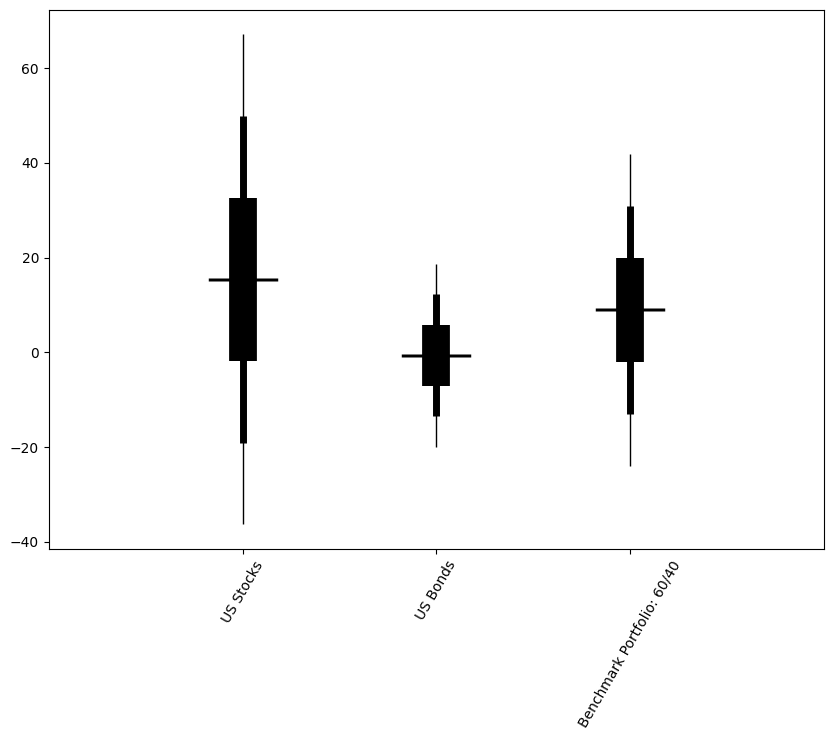

In [50]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

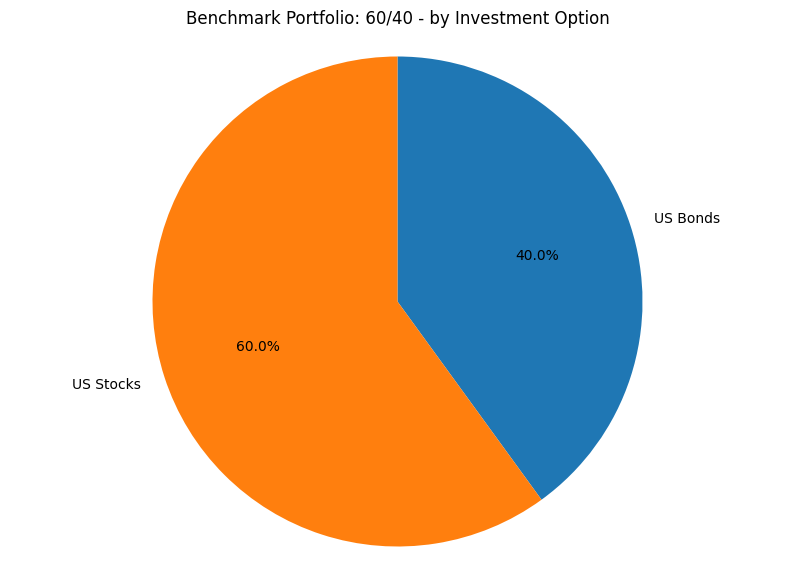

US Bonds    0.40
US Stocks   0.60



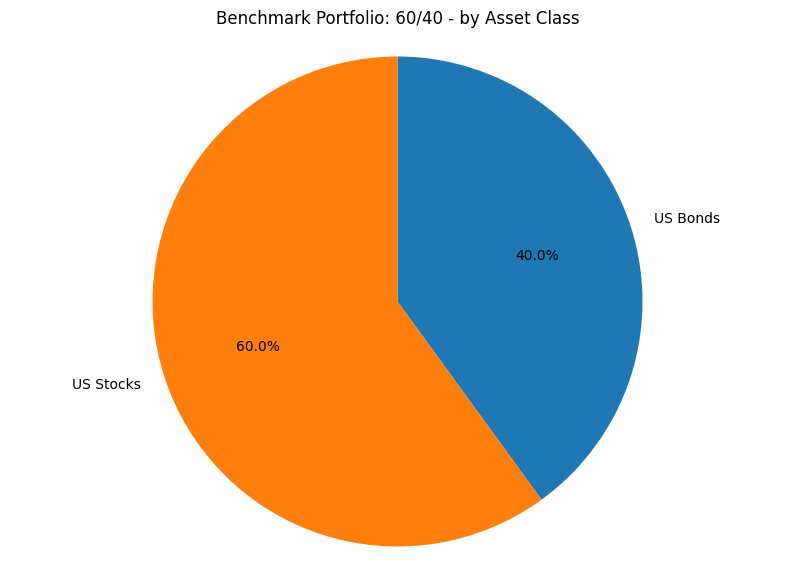

US Bonds    0.40
US Stocks   0.60



In [51]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Class'])

In [52]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Benchmark Portfolio: 60/40 Weights:
    US Stocks                      0.6000
    US Bonds                       0.4000


### Optimize Portfolio

In [53]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [54]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 6,
    'Worst Typical Down Year': None,
    'Black Swan': -20
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).